## Exercise 05

# Neural networks

## 4.1 Little Red Riding Hood Network

Train a neural network to solve the  Little Red Riding Hood problem in sklern and Keras. Try the neural networ with different inputs and report the results.


### Usando Scikit Learn

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier

In [2]:
X = np.array ([[1,1,0,0], [0,1,1,0], [0,0,0,1]])

In [3]:
y = np.array ([[1,0,0,0], [0,0,1,1], [0,1,1,0]])

In [4]:
nn1 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(3), random_state=31415, max_iter=2500)

In [5]:
nn1.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=3, learning_rate='constant',
       learning_rate_init=0.001, max_iter=2500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=31415,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [6]:
nn1.predict(X)

array([[1, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 1, 0]])

In [7]:
import matplotlib.pyplot as plt

plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.001))
plt.plot(nn1.loss_curve_)
plt.show()

#### Prueba de la red en diferentes escenarios

Teniendo en cuenta que solo existen 2 opciones por cada variable, se evaluarán las 16 posibles alternativas:

In [8]:
X_test=np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[1,0,0,1],[1,0,0,0],
                 [0,1,1,1],[0,1,1,0],[0,1,0,1],[0,1,0,0],[0,0,1,1],[0,0,1,0],[0,0,0,1],[0,0,0,0],])
y_pred=nn1.predict(X_test)

In [9]:
Try_nn1=pd.DataFrame(np.concatenate((X_test,y_pred),axis=1),
             columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled', 'Scream', 'Hug','Food','Kiss'])
Try_nn1

,Big Ears,Big Teeth,Handsome,Wrinkled,Scream,Hug,Food,Kiss
0,1,1,1,1,0,0,1,0
1,1,1,1,0,1,0,0,1
2,1,1,0,1,1,0,0,0
3,1,1,0,0,1,0,0,0
4,1,0,1,1,0,1,1,0
5,1,0,1,0,0,0,1,1
6,1,0,0,1,0,1,1,0
7,1,0,0,0,1,0,0,0
8,0,1,1,1,0,0,1,1
9,0,1,1,0,0,0,1,1


A partir de todas las posibles opciones se opuede notar que la respuesta más frecuente será ofrecer comida (75% de las veces), seguidas por besar y abrazar (30% de las veces) mientars que gritar es el resultdo menos frecuento con solo el 25% de las veces.

### Usando Keras

In [10]:
import pandas as pd
import numpy as np
X = np.array ([[1,1,0,0], [0,1,1,0], [0,0,0,1]])
y = np.array ([[1,0,0,0], [0,0,1,1], [0,1,1,0]])

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Variación del número de neuronas 

In [12]:
res=[]
n_neu=[]
for i in range(1,101):
    n_neu.append(i)
    nn2 = Sequential()
    nn2.add(Dense(i, input_dim=4, activation='relu'))
    nn2.add(Dense(4, activation='sigmoid'))
    
    nn2.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
    
    nn2.fit(X, y, epochs=100, verbose=0)
    
    scores = nn2.evaluate(X, y)
    
    res.append(scores[1])

3/3 [==============================] - 2s 606ms/step


#### Gráfico de Cambio en Accuracy según el aumento en las neuronas.

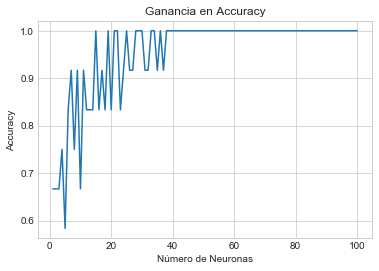

In [13]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
plt.title("Ganancia en Accuracy")
plt.xlabel("Número de Neuronas")
plt.ylabel("Accuracy")
plt.plot(n_neu, res)
plt.show()

Se seleccionarán 40 neuronas densamente conectadas.

#### Entrenamiento de la red Final

In [14]:
nn2 = Sequential()
nn2.add(Dense(40, input_dim=4, activation='relu'))
nn2.add(Dense(4, activation='sigmoid'))

In [15]:
nn2.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

In [16]:
nn2.fit(X, y, epochs=100, verbose=2)

Epoch 1/100
 - 4s - loss: 0.2617 - binary_accuracy: 0.4167
Epoch 2/100
 - 0s - loss: 0.2604 - binary_accuracy: 0.4167
Epoch 3/100
 - 0s - loss: 0.2586 - binary_accuracy: 0.4167
Epoch 4/100
 - 0s - loss: 0.2569 - binary_accuracy: 0.4167
Epoch 5/100
 - 0s - loss: 0.2552 - binary_accuracy: 0.5000
Epoch 6/100
 - 0s - loss: 0.2534 - binary_accuracy: 0.5000
Epoch 7/100
 - 0s - loss: 0.2517 - binary_accuracy: 0.5000
Epoch 8/100
 - 0s - loss: 0.2500 - binary_accuracy: 0.5000
Epoch 9/100
 - 0s - loss: 0.2483 - binary_accuracy: 0.5000
Epoch 10/100
 - 0s - loss: 0.2466 - binary_accuracy: 0.5000
Epoch 11/100
 - 0s - loss: 0.2449 - binary_accuracy: 0.5000
Epoch 12/100
 - 0s - loss: 0.2433 - binary_accuracy: 0.5000
Epoch 13/100
 - 0s - loss: 0.2416 - binary_accuracy: 0.5000
Epoch 14/100
 - 0s - loss: 0.2400 - binary_accuracy: 0.5000
Epoch 15/100
 - 0s - loss: 0.2383 - binary_accuracy: 0.5833
Epoch 16/100
 - 0s - loss: 0.2367 - binary_accuracy: 0.5833
Epoch 17/100
 - 0s - loss: 0.2350 - binary_accura

In [17]:
scores = nn2.evaluate(X, y)
print((nn2.metrics_names[1], scores[1]*100))
print (nn2.predict(X).round())

3/3 [==============================] - 2s 655ms/step
('binary_accuracy', 100.0)
[[1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 1. 0.]]


#### Prueba de la red en diferentes escenarios

In [18]:
X_test=np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[1,0,0,1],[1,0,0,0],
                 [0,1,1,1],[0,1,1,0],[0,1,0,1],[0,1,0,0],[0,0,1,1],[0,0,1,0],[0,0,0,1],[0,0,0,0],])

In [19]:
y_pred_nn2=nn2.predict(X_test).round(0)

In [20]:
Try_nn2=pd.DataFrame(np.concatenate((X_test,y_pred_nn2),axis=1),
             columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled', 'Scream', 'Hug','Food','Kiss'])
Try_nn2

,Big Ears,Big Teeth,Handsome,Wrinkled,Scream,Hug,Food,Kiss
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
9,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


A partir de todas las posibles opciones se opuede notar que la respuesta más frecuente será ofrecer comida (63% de las veces), seguidas por besar y abrazar (31% de las veces) mientars que gritar es el resultdo menos frecuento con solo el 19% de las veces.

Comparando con el resultado de la red neutranal entrenada en Scikit Learn se nota que la observacion 6: Big ears, handsome and wrinkled, ya que este da como resultado ofrecer comida y besar. Por otro lado la red entrenada en Keras da como resultado gritar, frecer comida y besar

## 4.2 Boston House Price Prediction

In the next questions we are going to work using the dataset *Boston*. This dataset measures the influence of socioeconomical factors on the price of several estates of the city of Boston. This dataset has 506 instances, each one characterized by 13 features:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT - % lower status of the population

Output variable:
* MEDV - Median value of owner-occupied homes in 1000's USD

**Note:** In this exercise we are going to predict the price of each estate, which is represented in the `MEDV` variable. It is important to remember that we are always aiming to predict `MEDV`, no matter which explanatory variables we are using. That means, in some cases we will use a subset of the 13 previously mentioned variables, while in other cases we will use all the 13 variables. But in no case we will change the dependent variable $y$.

Load the dataset using `from sklearn.datasets import load_boston`.

In [21]:
from sklearn.datasets import load_boston
boston = load_boston()

Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.

Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn.

In [22]:
data=pd.DataFrame(boston.data, columns=boston.feature_names)
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.

In [23]:
data["MEDV"]=boston.target
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


Use the function `.describe()` from Pandas for obtaining statistics about each column.

In [24]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 4.3 Feature analysis:

Using the DataFrame generated in the previous section:
* Filter the dataset to just these features:
     * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
     * Dependent: 'MEDV'.

In [25]:
features=['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE', 'MEDV']
db=data[features]
db.head(3)

,LSTAT,INDUS,NOX,RM,AGE,MEDV
0,4.98,2.31,0.538,6.575,65.2,24.0
1,9.14,7.07,0.469,6.421,78.9,21.6
2,4.03,7.07,0.469,7.185,61.1,34.7


* Generate a scatter matrix among the features mentioned above using Pandas (`scatter_matrix`) or Seaborn (` pairplot`).

In [26]:
#pd.plotting.scatter_matrix(db, alpha=0.2)

In [27]:
#sns.pairplot(db, size=2, palette=sns.color_palette("hls", 8))

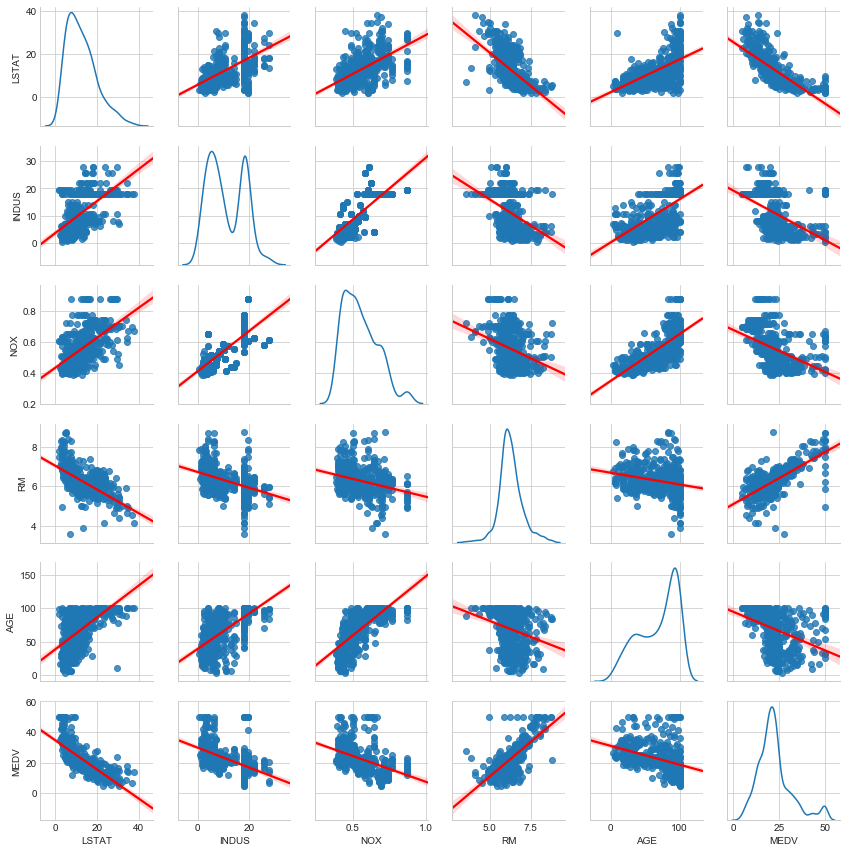

In [28]:
import seaborn as sns
g = sns.pairplot(db, size=2, kind="reg", diag_kind ="kde", plot_kws={'line_kws':{'color':'red'}})

XXXXX  Escribir las correlaciones aparentes a partir de la a grafica XXXXXX

* Generate the correlation matrix between these variables using `numpy.corrcoef`. Also include `MEDV`.
     * Which characteristics are more correlated?    

In [29]:
db.corr()

,LSTAT,INDUS,NOX,RM,AGE,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,0.602339,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,0.644779,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,0.731470,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,-0.240265,0.695360
AGE,0.602339,0.644779,0.731470,-0.240265,1.000000,-0.376955
MEDV,-0.737663,-0.483725,-0.427321,0.695360,-0.376955,1.000000


XXXX Notar caracteristicas de la matriz de correlacion XXXXX

 * BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

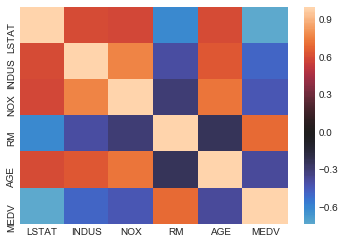

In [30]:
sns.heatmap(db.corr(), center=0)

## 4.4 Modeling linear and non linear relationships

* How does the model perform on $ D_1 $ and $ D_2 $? Why?

* Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$

In [31]:
D1_X, D1_y= data["RM"], data["MEDV"]
D2_X, D2_y= data["LSTAT"], data["MEDV"]

* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $

In [32]:
from sklearn.model_selection import train_test_split
D1_X_train, D1_X_test, D1_y_train, D1_y_test = train_test_split(D1_X, D1_y, test_size=0.3, random_state=31415)
D2_X_train, D2_X_test, D2_y_train, D2_y_test = train_test_split(D2_X, D2_y, test_size=0.3, random_state=31415)

* Train a linear regression model on both subsets of data:

In [33]:
from sklearn.linear_model import LinearRegression

# Definición del objeto
logreg_D1 = LinearRegression()
logreg_D2 = LinearRegression()

In [34]:
# Ajuste del modelo en cunjunto de entrenamiento.
logreg_D1.fit(D1_X_train.values.reshape(-1, 1),D1_y_train.values.reshape(-1, 1))
logreg_D2.fit(D2_X_train.values.reshape(-1, 1),D2_y_train.values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
# Predecir en Conjunto de Test
y_pred_D1=logreg_D1.predict(D1_X_test.values.reshape(-1, 1))
y_pred_D2=logreg_D2.predict(D2_X_test.values.reshape(-1, 1))

* Report the mean square error on the test set

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

$D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$

In [37]:
print("MSE: %.2f"% mean_squared_error(D1_y_test, y_pred_D1))
print('R Cuadrado: %.2f' % r2_score(D1_y_test, y_pred_D1))

MSE: 44.92
R Cuadrado: 0.39


$D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$

In [38]:
print("MSE: %.2f"% mean_squared_error(D2_y_test, y_pred_D2))
print('R Cuadrado: %.2f' % r2_score(D2_y_test, y_pred_D2))

MSE: 36.26
R Cuadrado: 0.50


* Print the values of $ w $ and $ w_0 $ of the regression equation

$D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$

In [39]:
print('Intercepto: ',logreg_D1.intercept_)
print('Coeficiente: ',logreg_D1.coef_)

Intercepto:  [-36.95044205]
Coeficiente:  [[9.51620105]]


$D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$

In [40]:
print('Intercepto: ',logreg_D2.intercept_)
print('Coeficiente: ',logreg_D2.coef_)

Intercepto:  [34.85763354]
Coeficiente:  [[-0.96303512]]


* Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data

$D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$

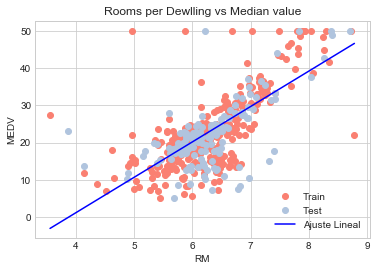

In [41]:
f = lambda x: logreg_D1.coef_*x + logreg_D1.intercept_
x_line = np.array([min(D1_X_train),max(D1_X_train)])

plt.xlabel("RM")
plt.ylabel("MEDV")
plt.title("Rooms per Dewlling vs Median value")
plt.plot(D1_X_train, D1_y_train, 'bo', c="salmon", label="Train")
plt.plot(D1_X_test, D1_y_test, 'bo', c="lightsteelblue", label="Test")
plt.plot(x_line, f(x_line)[0,], c="blue", label="Ajuste Lineal")
plt.legend()

$D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$

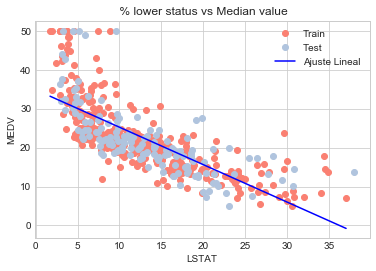

In [42]:
f = lambda x: logreg_D2.coef_*x + logreg_D2.intercept_
x_line = np.array([min(D2_X_train),max(D2_X_train)])

plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.title(" % lower status vs Median value")
plt.plot(D2_X_train, D2_y_train, 'bo', c="salmon", label="Train")
plt.plot(D2_X_test, D2_y_test, 'bo', c="lightsteelblue", label="Test")
plt.plot(x_line, f(x_line)[0,], c="blue", label="Ajuste Lineal")
plt.legend()

* How does the model perform on $ D_1 $ and $ D_2 $? Why?

XXXX Escribir los resultados de los modelos en terminos de MSE y R cuadrado, adicionalmente las interpretaciones de los ajustes lineales de las graficas anteriroes XXXX

## 4.5 Training a regression model

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)
* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set
* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set
* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set
     2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set
     3. Which model has better performance? Why?

Generate a 70-30 partitioning of the data using all the features. (Do not include the dependent variable MEDV)

In [43]:
feature_cols=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
X=data[feature_cols]
y=data['MEDV']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31415)

* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set

In [45]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

# Prediccion sobre el conjunto test
y_pred=linreg.predict(X_test)

print("MSE: %.2f"% mean_squared_error(y_test, y_pred))
print('R Cuadrado: %.2f'% r2_score(y_test, y_pred))

MSE: 25.99
R Cuadrado: 0.65


* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set

In [116]:
from sklearn.neural_network import MLPRegressor
res=[]
n_neu=[]
for i in range(1800,1850,1):
    n_neu.append(i)
    
    nnet=MLPRegressor(solver='adam',alpha=1e-5, hidden_layer_sizes=(i,), random_state=31415, max_iter=20000)
    nnet_fit=nnet.fit(X_train,y_train)
    nnet_pred=nnet.predict(X_test)
    mse_nnet=mean_squared_error(y_test, nnet_pred)    
  
    res.append(mse_nnet)

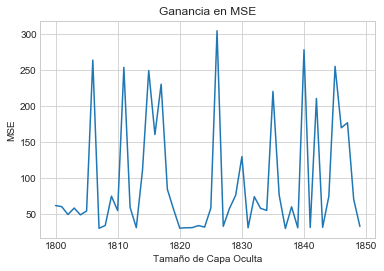

In [117]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
plt.title("Ganancia en MSE")
plt.xlabel("Tamaño de Capa Oculta")
plt.ylabel("MSE")
plt.plot(n_neu, res)
plt.show()

In [118]:
MSE_min=n_neu[res.index(min(res))]
MSE_min


1837

In [120]:
min(res)

29.829668114262834

In [123]:
nn3 = MLPRegressor(solver='adam', alpha=1e-5, hidden_layer_sizes=(1837), random_state=31415, max_iter=20000)
nn3.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=1837, learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=31415,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

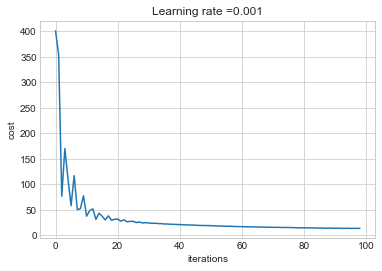

In [124]:
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.001))
plt.plot(nn3.loss_curve_)
plt.show()

In [125]:
# Prediccion sobre el conjunto test
y_pred_nn=nn3.predict(X_test)

In [126]:
print("MSE: %.2f"% mean_squared_error(y_test, y_pred_nn))

MSE: 29.83


* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```

In [129]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)

Train a linear regression model using the scaled data.
* Report the mean square error on the test set


In [130]:
linreg=LinearRegression()
linreg.fit(X_train_s,y_train)

# Prediccion sobre el conjunto test
y_pred_s=linreg.predict(X_test_s)

print("MSE: %.2f"% mean_squared_error(y_test, y_pred_s))

MSE: 25.99


Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
* Report the mean square error on the test set


In [131]:
nn4 = MLPRegressor(solver='adam', alpha=1e-5, hidden_layer_sizes=(128,512), random_state=31415, max_iter=20000)
nn4.fit(X_train_s,y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 512), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=31415,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [133]:
y_pred_nn4=nn4.predict(X_test_s)

In [134]:
print("MSE: %.2f"% mean_squared_error(y_test, y_pred_nn4))

MSE: 12.88


Which model has better performance? Why?

XXXXXRedactar Concusiones XXXXXXXXXXXX